In [4]:
%matplotlib inline
import itertools 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from tensorflow import keras
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, SCORERS, f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier


In [5]:
dataset = pd.read_csv("final_info.csv")

In [6]:
dataset.drop(["Unnamed: 0"], axis = 1, inplace=True)
dataset.head()

,Index,PredictedAccuracy,RMSE,D0,D1,D2,D3,D4,ImageSize,ModelSize
0,1,0.822721,1998.871808,0,1,2,2,2,192,25.807101
1,2,0.822721,1998.871808,0,1,2,2,2,192,24.203754
2,3,0.822721,1998.871808,0,1,2,2,2,192,27.247516
3,4,0.822721,1998.871808,0,1,2,2,2,192,27.247516
4,5,0.822721,1998.871808,0,1,2,2,2,192,27.247516


In [7]:
len(dataset.index)

4892

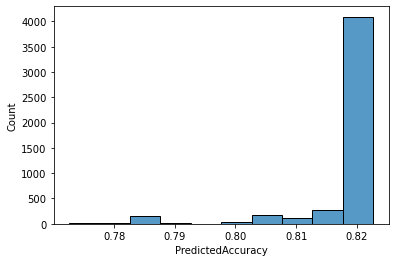

In [8]:
histogram_PredictedAccuracy = sns.histplot(dataset["PredictedAccuracy"],bins=10,kde=False)
fig_PredictedAccuracy = histogram_PredictedAccuracy.get_figure()
fig_PredictedAccuracy.savefig("PredictedAccuracy_histogram.png")



686.236544 1999.904
1998.871808    3417
1221.779264      40
1388.731200      39
1980.734720      34
1964.698880      34
               ... 
1892.673792       1
1870.133504       1
1862.129408       1
1917.248000       1
714.084352        1
Name: RMSE, Length: 907, dtype: int64


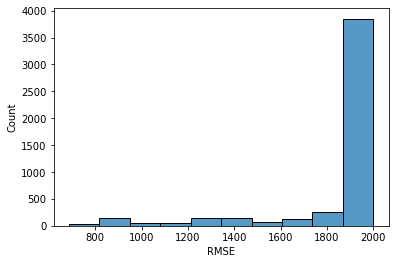

In [9]:
histogram_RMSE = sns.histplot(dataset["RMSE"],bins=10,kde=False)
print(min(dataset["RMSE"]), max(dataset["RMSE"]))
print(dataset['RMSE']. value_counts())
fig_RMSE = histogram_RMSE.get_figure()
fig_RMSE.savefig("RMSE_histogram.png")

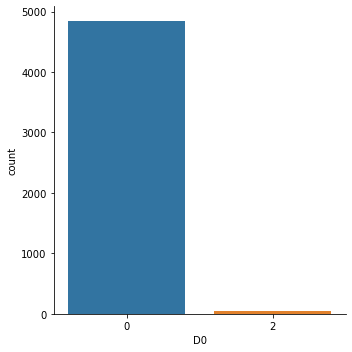

In [10]:
histogram = sns.catplot(x="D0",kind="count", data=dataset)
histogram.savefig("D0_histogram.png")

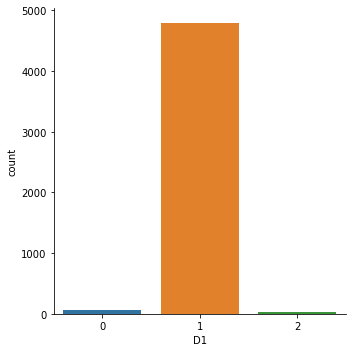

In [11]:
histogram = sns.catplot(x="D1",kind="count", data=dataset)
histogram.savefig("D1_histogram.png")

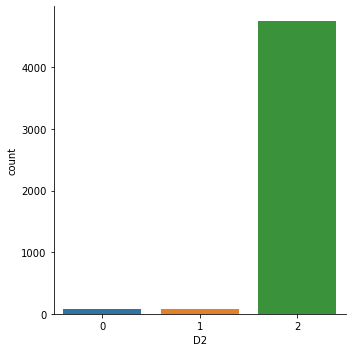

In [12]:
histogram = sns.catplot(x="D2",kind="count", data=dataset)
histogram.savefig("D2_histogram.png")

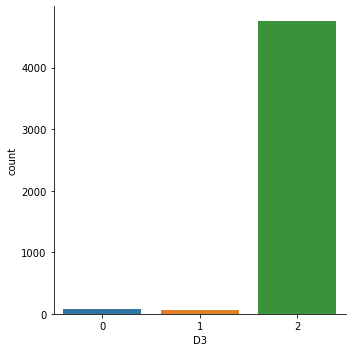

In [13]:
histogram = sns.catplot(x="D3",kind="count", data=dataset)
histogram.savefig("D3_histogram.png")

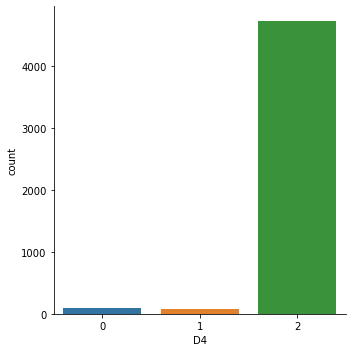

In [14]:
histogram = sns.catplot(x="D4",kind="count", data=dataset)
histogram.savefig("D4_histogram.png")

128 192


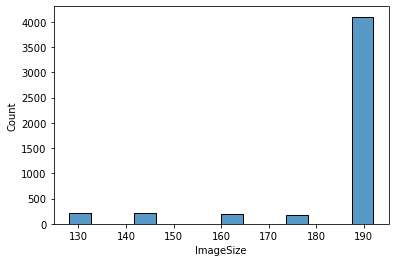

In [15]:
histogram_ImageSize = sns.histplot(dataset["ImageSize"])
fig_ImageSize = histogram_ImageSize.get_figure()
fig_ImageSize.savefig("ImageSize_histogram.png")
print(min(dataset["ImageSize"]), max(dataset["ImageSize"]))

11.688998222351074 34.10782051086426


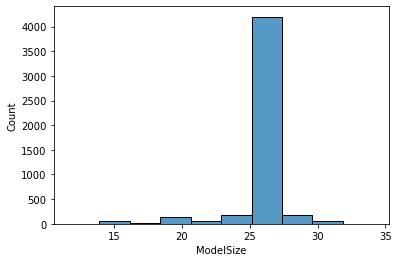

In [16]:
histogram_ModelSize = sns.histplot(dataset["ModelSize"],bins=10,kde=False)
fig_ModelSize = histogram_ModelSize.get_figure()
fig_ModelSize.savefig("ModelSize_histogram.png")
print(min(dataset["ModelSize"]), max(dataset["ModelSize"]))